In [1]:
# Import dependecnies
from pandas import *
import numpy as np
import pickle
from savReaderWriter import * 
import matplotlib.pyplot as plt

# Change display height and maximum number of rows to print
set_option('display.height', 500)
set_option('display.max_rows', 500)

height has been deprecated.



In [2]:
# Read data from .sav file
with SavReader('C:/Research/TRB Data Challenge/NHTS Data 2017/Spss/trippub.sav') as reader:
    header  = reader.header
    records = reader.all()

In [3]:
# Convert data into a dataframe
myTrip=DataFrame(records) #print (myTrip.shape)
myTrip.columns=header #923,572 rows and 102 columns

In [4]:
# Sort the file
myTrip.sort_values(['houseid', 'personid', 'tdtrpnum'], ascending=[True, True, True], inplace=True)
myTrip.reset_index(drop=True,inplace = True)

In [18]:
# read the hh file
with SavReader('C:/Research/TRB Data Challenge/NHTS Data 2017/Spss/hhpub.sav') as reader:
    header  = reader.header
    records = reader.all()
    hh=DataFrame(records) 
    print (hh.shape)
    hh.columns=header #923,572 rows and 102 columns

(129696, 59)


In [20]:
# Sort hh file
hh.sort_values(['houseid'], ascending=[True], inplace=True)
hh.reset_index(drop=True,inplace = True)
hh_short = hh[['houseid','wthhfin']]
print (hh_short.shape)

# merge hh short file with the trip file
#myTrip = merge(myTrip, hh_short, on=['houseid'], how='left')
#print 'New shape of the myTrip file: ',(myTrip.shape)

(129696, 2)


In [3]:
#Read the person file
with SavReader('C:/Research/TRB Data Challenge/NHTS Data 2017/Spss/perpub.sav') as reader:
    header  = reader.header
    records = reader.all()
    per=DataFrame(records) 
    print (per.shape)
    per.columns=header #923,572 rows and 102 columns

(264234, 119)


In [4]:
# Sort person file
per.sort_values(['houseid', 'personid'], ascending=[True, True], inplace=True)
per.reset_index(drop=True,inplace = True)


In [20]:
# Get some distribution from the household file
per['r_age_recode'] = ((per['r_age'] >=5) & (per['r_age']<=15))*1 + ((per['r_age'] >=16) & (per['r_age']<=19))*2 + ((per['r_age'] >=20) & (per['r_age']<=29))*3 + ((per['r_age'] >=30) & (per['r_age']<=39))*4 + ((per['r_age'] >=40) & (per['r_age']<=49))*5 + ((per['r_age'] >=50) & (per['r_age']<=59))*6 + ((per['r_age'] >=60) & (per['r_age']<=64))*7 + ((per['r_age'] >=65))*8
per.r_age_recode.value_counts().sort_index()

# Get the weighted age count
per.groupby(['r_age_recode']).sum()['wtperfin']

# Get the weighted driving license distribution
per.groupby(['driver']).sum()['wtperfin']

# Get the weighted gender distribution
per.groupby(['r_sex']).sum()['wtperfin']

# Get the weighted gender distribution
per.groupby(['educ']).sum()['wtperfin']

# Get the weighted gender distribution
per.groupby(['prmact']).sum()['wtperfin']

prmact
-1    4.549636e+07
-7    2.714633e+04
-8    7.799825e+03
01    1.354929e+08
02    7.469914e+06
03    1.065536e+07
04    1.869186e+07
05    1.961737e+07
06    4.602781e+07
97    1.811262e+07
Name: wtperfin, dtype: float64

In [35]:
# Recode trpmiles in the myTrip file
myTrip['trpmiles_recoded'] = (myTrip['trpmiles'] == -9) * 0 + ((myTrip['trpmiles'] >= 0) & (myTrip['trpmiles'] <= 2)) * 1 + ((myTrip['trpmiles'] > 2) & (myTrip['trpmiles'] <= 5)) * 2 + ((myTrip['trpmiles'] > 5) & (myTrip['trpmiles'] <= 10)) * 3 + ((myTrip['trpmiles'] > 10) & (myTrip['trpmiles'] <= 20)) * 4 + ((myTrip['trpmiles'] > 20) & (myTrip['trpmiles'] <= 30)) * 5 + ((myTrip['trpmiles'] > 30) & (myTrip['trpmiles'] <= 40)) * 6 + ((myTrip['trpmiles'] > 40) & (myTrip['trpmiles'] <= 50)) * 7 + ((myTrip['trpmiles'] > 50) & (myTrip['trpmiles'] <= 100)) * 8 + ((myTrip['trpmiles'] > 100) & (myTrip['trpmiles'] <= 200)) * 9 + ((myTrip['trpmiles'] > 200) & (myTrip['trpmiles'] <= 500)) * 10 + ((myTrip['trpmiles'] > 500) & (myTrip['trpmiles'] <= 1000)) * 11 + ((myTrip['trpmiles'] > 1000) & (myTrip['trpmiles'] <= 2000)) * 12 + ((myTrip['trpmiles'] > 2000) & (myTrip['trpmiles'] <= 5000)) * 13 +((myTrip['trpmiles'] > 5000)) * 14

# Get the weighted distrbution of the trip miles
myTrip.groupby(['trpmiles_recoded']).sum()['wttrdfin']

# Start time analysis
myTrip['strttime_min'] = [(int(a[0:2])*60 + int(a[2:4]))  for a in myTrip.strttime.tolist()]
myTrip['endtime_min'] = [(int(a[0:2])*60 + int(a[2:4]))  for a in myTrip.endtime.tolist()]

print 'minimum start time, myTrip: ',myTrip.strttime_min.min()
print 'maximum start time, myTrip: ',myTrip.strttime_min.max()

print 'minimum end time, myTrip: ',myTrip.endtime_min.min()
print 'maximum end time, myTrip: ',myTrip.endtime_min.max()

myTrip['strttime_min_recode'] = ((myTrip['strttime_min'] >= 0) & (myTrip['strttime_min'] <= 240)) * 1 +((myTrip['strttime_min'] > 240) & (myTrip['strttime_min'] <= 360)) * 2 +((myTrip['strttime_min'] > 360) & (myTrip['strttime_min'] <= 480)) * 3 +((myTrip['strttime_min'] > 480) & (myTrip['strttime_min'] <= 600)) * 4 +((myTrip['strttime_min'] > 600) & (myTrip['strttime_min'] <= 720)) * 5 +((myTrip['strttime_min'] > 720) & (myTrip['strttime_min'] <= 840)) * 6 +((myTrip['strttime_min'] > 840) & (myTrip['strttime_min'] <= 960)) * 7 +((myTrip['strttime_min'] > 960) & (myTrip['strttime_min'] <= 1080)) * 8 +((myTrip['strttime_min'] > 1080) & (myTrip['strttime_min'] <= 1200)) * 9 +((myTrip['strttime_min'] > 1200) & (myTrip['strttime_min'] <= 1320)) * 10 +((myTrip['strttime_min'] > 1320) & (myTrip['strttime_min'] <= 1440)) * 11 
myTrip['endtime_min_recode'] = ((myTrip['endtime_min'] >= 0) & (myTrip['endtime_min'] <= 240)) * 1 +((myTrip['endtime_min'] > 240) & (myTrip['endtime_min'] <= 360)) * 2 +((myTrip['endtime_min'] > 360) & (myTrip['endtime_min'] <= 480)) * 3 +((myTrip['endtime_min'] > 480) & (myTrip['endtime_min'] <= 600)) * 4 +((myTrip['endtime_min'] > 600) & (myTrip['endtime_min'] <= 720)) * 5 +((myTrip['endtime_min'] > 720) & (myTrip['endtime_min'] <= 840)) * 6 +((myTrip['endtime_min'] > 840) & (myTrip['endtime_min'] <= 960)) * 7 +((myTrip['endtime_min'] > 960) & (myTrip['endtime_min'] <= 1080)) * 8 +((myTrip['endtime_min'] > 1080) & (myTrip['endtime_min'] <= 1200)) * 9 +((myTrip['endtime_min'] > 1200) & (myTrip['endtime_min'] <= 1320)) * 10 +((myTrip['endtime_min'] > 1320) & (myTrip['endtime_min'] <= 1440)) * 11 

# Get the start time distribution in the myTrip file
myTrip.groupby(['strttime_min_recode']).sum()['wttrdfin']

# Get the start time distribution in the myTrip file
myTrip.groupby(['endtime_min_recode']).sum()['wttrdfin']

minimum start time, myTrip:  0
maximum start time, myTrip:  1439
minimum end time, myTrip:  0
maximum end time, myTrip:  1439


endtime_min_recode
1     2.906149e+09
2     4.422567e+09
3     3.473969e+10
4     4.453871e+10
5     4.587962e+10
6     5.129068e+10
7     5.592162e+10
8     5.895585e+10
9     4.297786e+10
10    2.122222e+10
11    8.297013e+09
Name: wttrdfin, dtype: float64

In [23]:
# Household file descrtiptives
# (1) Get the household vehicle count
hh.groupby(['hhvehcnt']).sum()['wthhfin']

# (2) Get the weighted household trip count
hh.groupby(['cnttdhh']).sum()['wthhfin']

# (3) Get weighted household size
hh.groupby(['hhsize']).sum()['wthhfin']

# (4) Get weighted household family income
hh.groupby(['hhfaminc']).sum()['wthhfin']

hhfaminc
-7    2.771684e+06
-8    8.561797e+05
-9    2.590322e+04
01    8.607121e+06
02    6.900342e+06
03    1.120173e+07
04    1.147109e+07
05    1.416885e+07
06    1.895294e+07
07    1.409148e+07
08    1.074918e+07
09    6.131339e+06
10    5.976166e+06
11    6.304255e+06
Name: wthhfin, dtype: float64

In [21]:
# Get the household descriptives from the households that made at least one shared ride trip
shre_hh_1st.groupby(['hhvehcnt']).sum()['wthhfin']


hhvehcnt
0.0     658370.392030
1.0     570311.334218
2.0     450396.711660
3.0     150135.035248
4.0      58346.901880
5.0      36437.563756
6.0       3977.660134
7.0       1025.774000
9.0       1315.733774
10.0       375.390577
Name: wthhfin, dtype: float64

shape of trp_shared (2813, 109)
shape of carTrps (795163, 109)
trip mile distribution among shared ride trips:  trpmiles_recoded
0     8.102537e+05
1     5.186450e+08
2     6.535287e+08
3     3.796823e+08
4     1.996604e+08
5     6.114921e+07
6     1.727684e+07
7     6.156128e+06
8     5.305890e+06
9     2.425445e+06
10    3.014466e+06
11    6.137003e+04
12    1.071520e+05
13    1.379977e+06
Name: wttrdfin, dtype: float64
trip mile distribution among car trips:  trpmiles_recoded
0     1.856261e+07
1     8.822859e+10
2     8.593486e+10
3     5.749792e+10
4     4.175883e+10
5     1.460401e+10
6     5.849468e+09
7     3.054369e+09
8     4.729068e+09
9     2.099050e+09
10    6.798096e+08
11    6.248951e+07
12    4.973464e+07
13    4.115883e+06
14    4.201506e+05
Name: wttrdfin, dtype: float64
start time frequency among shared ride trips:  strttime_min_recode
1     1.438962e+08
2     3.000336e+07
3     1.098202e+08
4     2.246655e+08
5     2.262590e+08
6     1.646965e+08
7     1.829197e+08


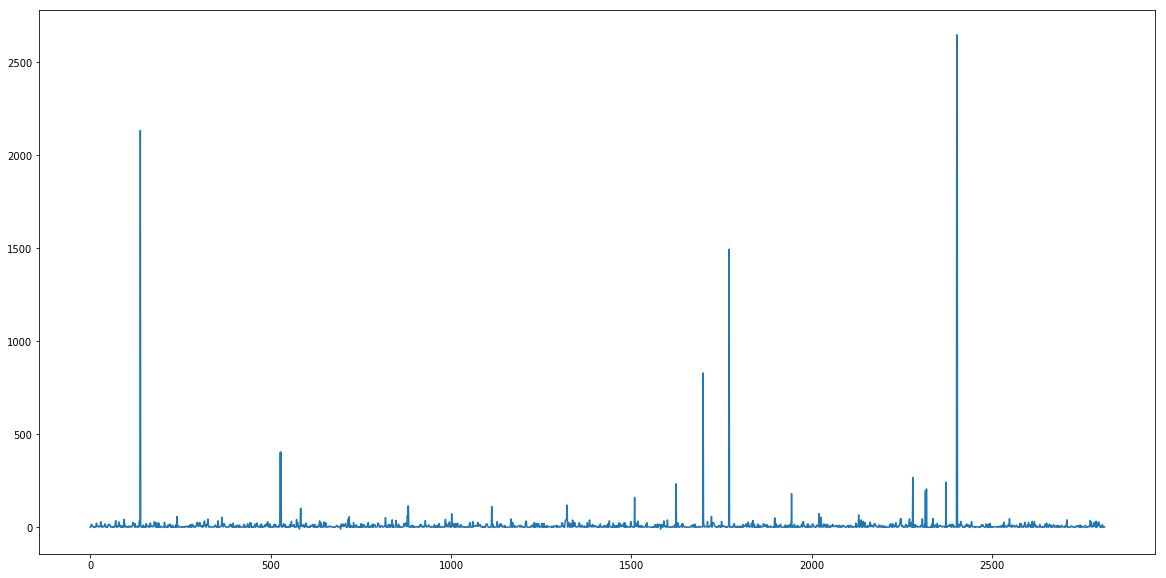

In [34]:
# Create a dummy for the ride sharing mode, taxi/uber/lift
myTrip['ride_share'] = (myTrip['trptrans'] == '17') # 2813 ride sharing trips
# Create a dummy for the transit mode
myTrip['Transit'] = ((myTrip['trptrans'] == '11') | (myTrip['trptrans'] == '14') | (myTrip['trptrans'] == '15') | (myTrip['trptrans'] == '16'))

trp_shared = myTrip[myTrip.trptrans == '17']
print 'shape of trp_shared', trp_shared.shape

carTrps = myTrip[(myTrip.trptrans == '03') | (myTrip.trptrans == '04') | (myTrip.trptrans == '05') | (myTrip.trptrans == '06')]
print 'shape of carTrps', carTrps.shape

# Get the trip mile distribution only among the shared ride trips
print 'trip mile distribution among shared ride trips: ',trp_shared.groupby(['trpmiles_recoded']).sum()['wttrdfin']

# Get the trip mile distribution only among the car/van/suv/pick up truck trips
print 'trip mile distribution among car trips: ', carTrps.groupby(['trpmiles_recoded']).sum()['wttrdfin']

# Get the start time distribution within the shared trips
print 'start time frequency among shared ride trips: ', trp_shared.groupby(['strttime_min_recode']).sum()['wttrdfin']

# Assessment of trpmiles in trp_shared file
print 'maximum trip miles', trp_shared.trpmiles.max()
print 'minimum trip miles', trp_shared.trpmiles.min()
print 'count of -9', trp_shared.trpmiles.tolist().count(-9)
print 'count of 0', trp_shared.trpmiles.tolist().count(0)

# Assessment of trpmiles in myTrip file
print 'maximum trip miles - myTrip file: ', myTrip.trpmiles.max()
print 'minimum trip miles - myTrip file: ', myTrip.trpmiles.min()
print 'count of -9 - myTrip file: ', myTrip.trpmiles.tolist().count(-9)
print 'count of 0 - myTrip file: ', myTrip.trpmiles.tolist().count(0)
print 'count of -1 - myTrip file: ', myTrip.trpmiles.tolist().count(-1)

# Plot trip miles
plt.figure(figsize = (20,10))
plt.plot(trp_shared.trpmiles.tolist())
plt.show()

In [48]:
# function to create a dummy to identify households that use taxi/uber/lyft
def modeind(group):  # Need to be grouoed by the household id
    
    global count
    
    rde_shre_id = []
    
    rdeShare = group['ride_share'].tolist()
    if (sum(rdeShare) > 0):
        count = count + 1
        rde_shre_id = [1 for i in xrange(len(rdeShare))]
    else:
        rde_shre_id = [0 for i in xrange(len(rdeShare))]
            
    group.loc[:,'rde_shre_hhid'] = rde_shre_id        
    
    return group


In [24]:
import pickle
# Import the pickle file containing the trip records that made at least one trip by taxi/uber/lyft
shre_rde_hh = read_pickle('C:/Research/TRB Data Challenge/NHTS Data 2017/Spss/hh_trp_taxi_02.pkl')

# Sort the data frame
shre_rde_hh.sort_values(['houseid', 'personid', 'tdtrpnum'], ascending=[True, True, True], inplace=True)
shre_rde_hh.reset_index(drop=True,inplace = True)

# Create a column counting the number of trips made by each household
trpcnt = shre_rde_hh.groupby(['houseid']).count()['tdtrpnum']
trpcnt = trpcnt.to_frame().reset_index()
trpcnt.columns = ['houseid','trpcnt_hh']
#print 'Type of Trpcnt: ', type(trpcnt)
#print(trpcnt.head(10))
trpcnt.sort_values(['houseid'], ascending=[True], inplace=True)
trpcnt.reset_index(drop=True,inplace = True)


# Get only the first column
# Make data frame with only the 1st row of the data frame
shre_hh_1st = shre_rde_hh.groupby(['houseid']).first().reset_index()   # 1352 households
print shre_hh_1st.shape

trpcnt2 = merge(trpcnt, shre_hh_1st, on = ['houseid'], how = 'right')
print 'shape of trpcnt2: ', trpcnt2.shape

# (1) Get the wighted trip count by hh weight
trpcnt2.groupby(['trpcnt_hh']).sum()['wthhfin']

# (2) Get the house hold size
trpcnt2.groupby(['hhsize']).sum()['wthhfin']

# (4) Get weighted household family income
trpcnt2.groupby(['hhfaminc']).sum()['wthhfin']

(1352, 106)
shape of trpcnt2:  (1352, 107)


hhfaminc
-7     15248.163054
-8      6730.743417
01    212213.244112
02    105115.281137
03    128272.945556
04    118589.864027
05    102350.288648
06    238714.672639
07    174347.701592
08    152281.457165
09    144639.110959
10    166919.524645
11    365269.500325
Name: wthhfin, dtype: float64

In [49]:
# Create an id to identify the housheolds where at least 1 trip has been made via ride share mode
count = 0
result = myTrip.groupby(['houseid'], group_keys = False ).apply(modeind)
myTrip['rde_shre_hhid'] = result.rde_shre_hhid
print 'Number of households made by the household who used at least 1 trip by taxi/uber/lyft', count
del result, count

Number of trips made by the household who used at least 1 trip by taxi/uber/lyft 1352


In [50]:
# Create a seperate dataframe containing only the households that developed at least one trip by taxi/uber/lyft
shre_rde_hh = myTrip[myTrip['rde_shre_hhid']==1]
print 'Number of household that use at least 1 taxi/uber/lyft trip', shre_rde_hh.shape

Number of household that use at least 1 taxi/uber/lyft trip (12496, 106)


In [51]:
import pickle
shre_rde_hh.to_pickle('C:/Research/TRB Data Challenge/NHTS Data 2017/Spss/hh_trp_taxi_02.pkl')  # This is the file with household weight attached

In [19]:
# Import the pickle file containing the trip records that made at least one trip by taxi/uber/lyft
shre_rde_hh = read_pickle('C:/Research/TRB Data Challenge/NHTS Data 2017/Spss/hh_trp_taxi_02.pkl')
#print 'shape of the file containing household trips making at least 1 trip by taxi/uber/lyft', shre_rde_hh.shape

# Sort the data frame
shre_rde_hh.sort_values(['houseid', 'personid', 'tdtrpnum'], ascending=[True, True, True], inplace=True)
shre_rde_hh.reset_index(drop=True,inplace = True)

# Count the number of trips by household
shre_rde_hh

# Make data frame with only the 1st row of the data frame
shre_hh_1st = shre_rde_hh.groupby(['houseid']).first().reset_index()   # 1352 households
print shre_hh_1st.shape

# Make data frame with only the last row of the data frame
shre_hh_last = shre_rde_hh.groupby(['houseid']).last().reset_index()   # 1352 households
print shre_hh_last.shape

(1352, 106)
(1352, 106)


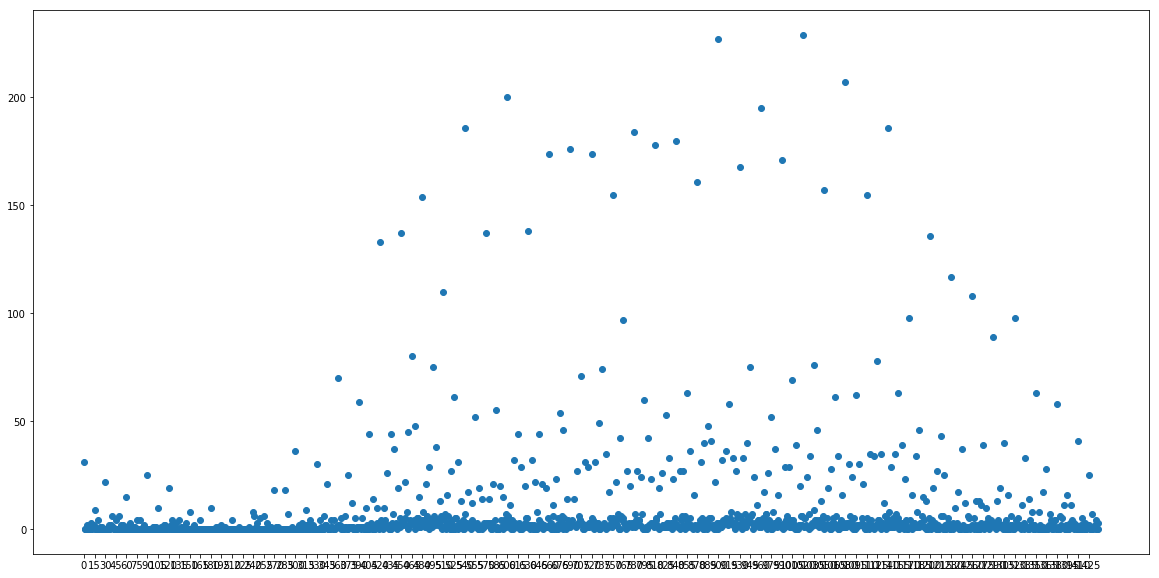

In [102]:
# Plot the start time
strttime = [(int(a[0:2])*60 + int(a[2:4]))  for a in shre_rde_hh.strttime.tolist()]
#strttime = [(int(a[2:4]))  for a in shre_rde_hh.strttime.tolist()]
#strttime

x_axis = list(range(1440))

strtme_freq = [strttime.count(a) for a in x_axis]


plt.figure(figsize = (20,10))


#plt.plot(x_axis, strtme_freq,zorder = 1)
plt.scatter(x_axis, strtme_freq, zorder = 2)
#plt.hist(strttime, normed = False, bins = 288)
plt.xticks(np.arange(min(x_axis),max(x_axis),15.0 ))
plt.show()







In [89]:
# Get the number of trips made by each household
num_trp = shre_rde_hh.groupby(["houseid"]).count()["tdtrpnum"]
#print 'type of num_trp', type(num_trp), 'Total number of trips', num_trp.sum()
#print 'how many trips produced by hoseholds, total' sum(num_trp.tolist())

num_trp_wtd = shre_rde_hh.groupby(["houseid"]).sum()["wttrdfin"]
#print 'weighted trip number: ', num_trp_wtd.head(10)

# Get the household size
hh_sze = shre_rde_hh.groupby(["houseid"]).first()["hhsize"]
#print hh_sze.head(20), hh_size.shape

hh_wt = shre_rde_hh.groupby(["houseid"]).first()["wthhfin"]
hh_sze_wtd = hh_sze * hh_wt 
#print 'weighted household size', hh_sze_wtd.head(10)

trp_by_sze = num_trp/hh_sze
#print type(trp_by_sze), trp_by_sze.head(10), 'average number of trips', trp_by_sze.mean(), trp_by_sze.std() 

trp_by_sze_wtd = num_trp_wtd/hh_sze_wtd
#print type(trp_by_sze_wtd), trp_by_sze_wtd.head(10), 'average number of trips', trp_by_sze_wtd.mean(), trp_by_sze_wtd.std()

# Average trip by purpose
num_trp_pur = shre_rde_hh.groupby(["houseid","whyto"]).count()["tdtrpnum"]
#print 'trip count by hhid', num_trp.head(10)
#print 'trip count by hhid and purpose', num_trp_pur.head(10)

# convert the series into dataframe
num_trp_pur = num_trp_pur.to_frame().reset_index()
#num_trp_pur.columns = ['houseid','whyto','trp_cnt']
#print num_trp_pur.head(10)
hh_sze = hh_sze.to_frame().reset_index()
#hh_sze.columns = ['houseid','hh_sze']
#print hh_sze.head(10)

new_df = merge(num_trp_pur,hh_sze, on = 'houseid' , how = 'left')
#print 'new data frame: ',new_df.head(10) 
new_df['trp_cnt_by_pur'] = new_df.tdtrpnum/new_df.hhsize   # This is a series
#type(trp_cnt_by_pur)
new_df.head(10)

# Calate average number of trips by purpose - normalized by hh_size
#print 'Average trip count by purpose for hh useing taxi/uber/lyft', new_df.groupby(['whyto']).mean()['trp_cnt_by_pur']

# Calate average number of trips by purpose - WO normalizing by hh_size
print 'Average trip count by purpose for hh useing taxi/uber/lyft WO normalizing by hh size', new_df.groupby(['whyto']).mean()['tdtrpnum']

Average trip count by purpose for hh useing taxi/uber/lyft WO normalizing by hh size whyto
-7    1.500000
-8    1.000000
01    2.927042
02    1.363636
03    1.847861
04    2.127049
05    1.520000
06    2.226667
07    2.525773
08    1.632911
09    1.666667
10    1.000000
11    1.832512
12    1.434286
13    2.035831
14    1.397351
15    2.069544
16    1.363248
17    1.766154
18    1.442424
19    1.732558
97    1.333333
Name: tdtrpnum, dtype: float64


In [11]:
# Age distribution of the people using ride sharing service
trp_rd_shr = myTrip[myTrip.trptrans == '17']
type(trp_rd_shr)
trp_rd_shr.shape
trp_rd_shr['r_age_recode'] = ((trp_rd_shr['r_age'] >=5) & (trp_rd_shr['r_age']<=15))*1 + ((trp_rd_shr['r_age'] >=16) & (trp_rd_shr['r_age']<=19))*2 + ((trp_rd_shr['r_age'] >=20) & (trp_rd_shr['r_age']<=29))*3 + ((trp_rd_shr['r_age'] >=30) & (trp_rd_shr['r_age']<=39))*4 + ((trp_rd_shr['r_age'] >=40) & (trp_rd_shr['r_age']<=49))*5 + ((trp_rd_shr['r_age'] >=50) & (trp_rd_shr['r_age']<=59))*6 + ((trp_rd_shr['r_age'] >=60) & (trp_rd_shr['r_age']<=64))*7 + ((trp_rd_shr['r_age'] >=65))*8
trp_rd_shr.r_age_recode.value_counts().sort_index()

# Recode r_age in the myTrip file
myTrip['r_age_recode'] = ((myTrip['r_age'] >=5) & (myTrip['r_age']<=15))*1 + ((myTrip['r_age'] >=16) & (myTrip['r_age']<=19))*2 + ((myTrip['r_age'] >=20) & (myTrip['r_age']<=29))*3 + ((myTrip['r_age'] >=30) & (myTrip['r_age']<=39))*4 + ((myTrip['r_age'] >=40) & (myTrip['r_age']<=49))*5 + ((myTrip['r_age'] >=50) & (myTrip['r_age']<=59))*6 + ((myTrip['r_age'] >=60) & (myTrip['r_age']<=64))*7 + ((myTrip['r_age'] >=65))*8
myTrip.r_age_recode.value_counts().sort_index()

C:\Users\annes\AppData\Local\conda\conda\envs\my_root\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


0      1216
1     79066
2     26705
3     72642
4    114958
5    118366
6    165086
7     99409
8    246124
Name: r_age_recode, dtype: int64

In [25]:
# Weighted distribution of age among the ride shared trips
trp_rd_shr.groupby(['r_age_recode']).sum()['wttrdfin']

# Weighted driving license distribution among the ride shared trips
trp_rd_shr.groupby(['driver']).sum()['wttrdfin']

# Weighted gender distribution among the ride shared trips
trp_rd_shr.groupby(['r_sex']).sum()['wttrdfin']

# Weighted education distribution among the ride shared trips
trp_rd_shr.groupby(['educ']).sum()['wttrdfin']

# Weighted primary activity distribution among the ride shared trips
trp_rd_shr.groupby(['prmact']).sum()['wttrdfin']

########################TRIP LEVEL#########################
# Weighted primary activity distribution among the ride shared trips
trp_rd_shr.groupby(['whyto']).sum()['wttrdfin']



whyto
-7    1.015935e+06
01    6.924817e+08
02    5.101662e+06
03    2.120006e+08
04    1.297612e+08
05    1.258221e+06
06    5.165205e+07
07    1.134354e+08
08    1.266676e+07
09    1.168010e+06
10    4.136099e+05
11    8.374648e+07
12    2.740333e+07
13    1.035004e+08
14    3.378968e+07
15    1.748615e+08
16    8.203668e+06
17    9.165860e+07
18    7.461123e+07
19    2.980360e+07
97    6.694551e+05
Name: wttrdfin, dtype: float64

In [13]:
# Wighted distributions among the whole trip file
myTrip.groupby(['whyto']).sum()['wttrdfin']

# Wighted distributions among the whole trip file
myTrip.groupby(['trptrans']).sum()['wttrdfin']

# Weighted distribution of age among the ride shared trips
print 'recoded age distribution: ', myTrip.groupby(['r_age_recode']).sum()['wttrdfin']

# Weighted driving license distribution among the ride shared trips
print 'driver distribution: ',myTrip.groupby(['driver']).sum()['wttrdfin']

# Weighted gender distribution among the ride shared trips
print 'gender distribution: ', myTrip.groupby(['r_sex']).sum()['wttrdfin']

# Weighted education distribution among the ride shared trips
print 'education distribution: ', myTrip.groupby(['educ']).sum()['wttrdfin']

# Weighted primary activity distribution among the ride shared trips
print 'primary activity distribution: ', myTrip.groupby(['prmact']).sum()['wttrdfin']

recoded age distribution:  r_age_recode
0    5.546895e+08
1    4.604365e+10
2    1.802056e+10
3    4.888947e+10
4    6.085567e+10
5    5.534545e+10
6    5.792002e+10
7    2.814726e+10
8    5.537520e+10
Name: wttrdfin, dtype: float64
driver distribution:  driver
-1    4.212968e+10
01    2.972826e+11
02    3.173966e+10
Name: wttrdfin, dtype: float64
gender distribution:  r_sex
-7    3.566065e+08
-8    4.852741e+07
01    1.788352e+11
02    1.919117e+11
Name: wttrdfin, dtype: float64
education distribution:  educ
-1    3.809539e+10
-7    8.954128e+07
-8    1.821771e+08
01    3.046807e+10
02    6.239443e+10
03    9.508508e+10
04    7.912062e+10
05    6.571666e+10
Name: wttrdfin, dtype: float64
primary activity distribution:  prmact
-1    4.616931e+10
-7    1.204190e+07
-8    8.935383e+06
01    1.876509e+11
02    8.764219e+09
03    1.141853e+10
04    2.366149e+10
05    2.138995e+10
06    5.364434e+10
97    1.843221e+10
Name: wttrdfin, dtype: float64


In [90]:
# Average trip by purpose FOR FULL DATASET

# Get household size
hh_sze = myTrip.groupby(["houseid"]).first()["hhsize"]

# Get count of trip by purpose
num_trp_pur = myTrip.groupby(["houseid","whyto"]).count()["tdtrpnum"]
#print 'trip count by hhid', num_trp.head(10)
#print 'trip count by hhid and purpose', num_trp_pur.head(10)

# convert the series into dataframe
num_trp_pur = num_trp_pur.to_frame().reset_index()
#num_trp_pur.columns = ['houseid','whyto','trp_cnt']
#print num_trp_pur.head(10)
hh_sze = hh_sze.to_frame().reset_index()
#hh_sze.columns = ['houseid','hh_sze']
#print hh_sze.head(10)

new_df = merge(num_trp_pur,hh_sze, on = 'houseid' , how = 'left')
#print 'new data frame: ',new_df.head(10) 
new_df['trp_cnt_by_pur'] = new_df.tdtrpnum/new_df.hhsize   # This is a series
#type(trp_cnt_by_pur)
new_df.head(10)

# Calate average number of trips by purpose
print 'Average trip count by purpose for hh ', new_df.groupby(['whyto']).mean()['trp_cnt_by_pur']

# Calate average number of trips by purpose - WO normalizing by hh_size
print 'Average trip count by purpose for hh WO normalizing by hh size', new_df.groupby(['whyto']).mean()['tdtrpnum']

Average trip count by purpose for hh  whyto
-7    0.863866
-8    0.594792
-9    0.433333
01    1.337298
02    0.629172
03    0.880069
04    0.835572
05    0.788004
06    0.939659
07    0.898312
08    0.477499
09    0.509140
10    0.611069
11    1.116413
12    0.808043
13    0.896992
14    0.852304
15    0.831760
16    0.763790
17    0.873349
18    0.746415
19    0.843029
97    0.640028
Name: trp_cnt_by_pur, dtype: float64
Average trip count by purpose for hh WO normalizing by hh size whyto
-7    1.952941
-8    1.208333
-9    1.142857
01    2.761522
02    1.319894
03    1.814994
04    1.628643
05    1.465648
06    2.344061
07    1.827686
08    1.661761
09    1.484109
10    1.269321
11    2.091440
12    1.433057
13    1.768905
14    1.504078
15    1.822643
16    1.463922
17    1.672772
18    1.386534
19    1.701582
97    1.456967
Name: tdtrpnum, dtype: float64


In [7]:
# Analyze the trips made by the household who made at least one trip by taxi/uber/lyft
# (1) What other modes did they use?
shre_rde_hh.trptrans.value_counts().sort_index()

# (2) How many trips by each household
no_trp = shre_rde_hh.groupby(['houseid']).size().reset_index(name = 'num_trp')
#no_trp.to_csv(r'C:/Research/TRB Data Challenge/NHTS Data 2017/Spss/no_trp_hh_shared.csv', header=True, float_format = '%.f', index=None, sep=' ', mode='a')  

# (3) Calculate household size
hh_size = shre_rde_hh.groupby(['houseid']).first

# (4) Wighted mode distribution of the households that made at least 1 trip by uber/taxi/lyft
shre_rde_hh.groupby(['trptrans']).sum()['wttrdfin']

trptrans
01    1.810001e+09
02    1.103067e+08
03    1.740749e+09
04    7.278887e+08
05    3.022042e+08
06    1.207737e+08
07    1.380577e+06
08    2.225558e+07
09    2.610799e+04
10    7.299008e+07
11    2.638221e+08
12    1.913315e+07
13    3.789826e+07
14    7.943299e+06
15    7.975816e+07
16    3.400404e+08
17    1.849203e+09
18    9.769028e+07
19    2.086302e+08
20    8.385918e+06
97    1.247511e+07
Name: wttrdfin, dtype: float64

In [9]:
shre_rde_hh.shape

(12496, 106)

In [39]:
sum((myTrip['trptrans'] == '18') * (myTrip['trpmiles']))/sum(myTrip['trptrans'] == '18')
sum((myTrip['trptrans'] == '17') * (myTrip['trpmiles']))/sum(myTrip['trptrans'] == '17')

11.49357483114111

In [42]:
trp_rent = myTrip[myTrip['trptrans']=='17']
trp_rent.whyto.value_counts().sort_index()

-7       1
01    1022
02      11
03     198
04     187
05       6
06      42
07     263
08      17
09       5
10       2
11     132
12      36
13     228
14      32
15     289
16      12
17     152
18     122
19      51
97       5
Name: whyto, dtype: int64

In [46]:
a = [1 for i in xrange(len([1,2,3]))]
a
b = [1 for i in range(len([1,2,3]))]
b

[1, 1, 1]

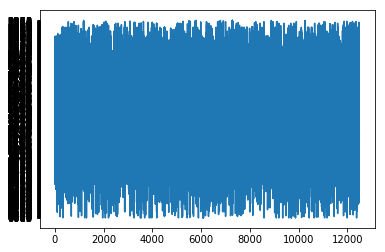

In [28]:
a = [1,2,3,4,5,6,7,8,9,10]
plt.plot(shre_rde_hh.strttime.tolist())
plt.show()

In [41]:
# Plot 'trpmiles' versus vmt_mile
trp_mile = myTrip.trpmiles.tolist()
vmt_mile = myTrip.vmt_mile.tolist()
plt.plot(trp_mile, vmt_mile)
plt.xlabel('trip miles')
plt.ylabel('vmt miles')
#plt.show()

print '-9 in trpmiles column: ', trp_mile.count(-9)   # 656
print '0 in trpmiles column: ', trp_mile.count(0)     # 485
print '-1 in vmt_mile column: ', vmt_mile.count(-1)   # 312273
print '0 in vmt_mile column: ', vmt_mile.count(0)     # 95

trp_mile = [x for x in trp_mile if x!= -9]
print 'length of trp_mile after getting rid off -9: ', len(trp_mile)  #922916




-9 in trpmiles column:  656
0 in trpmiles column:  485
-1 in vmt_mile column:  312273
0 in vmt_mile column:  95
length of trp_mile after getting rid off -9:  922916


In [10]:
myTrip.shape


(923572, 104)